Tenure: Tiempo que el cliente ha estado con la empresa (en meses).
Churn: Indica si el cliente abandonó la empresa ('Yes' = Abandonó, 'No' = Sigue activo).
Precisión del modelo: 0.80
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



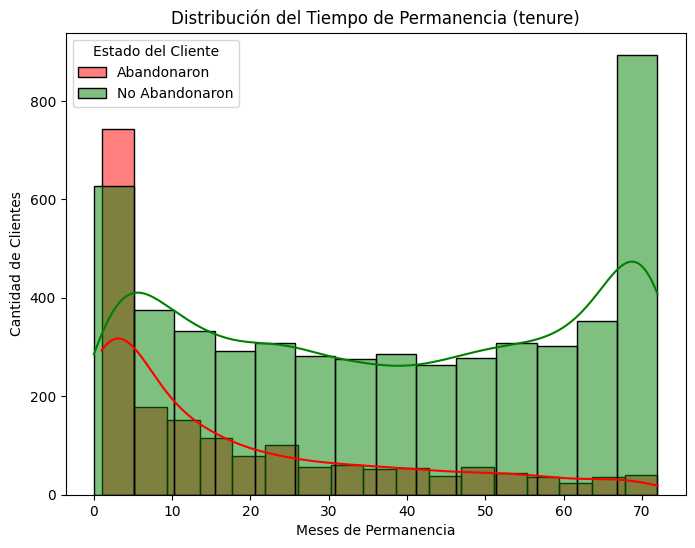

/tmp/ipython-input-7-1558395258.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Churn'], y=data['MonthlyCharges'], palette='Set2')


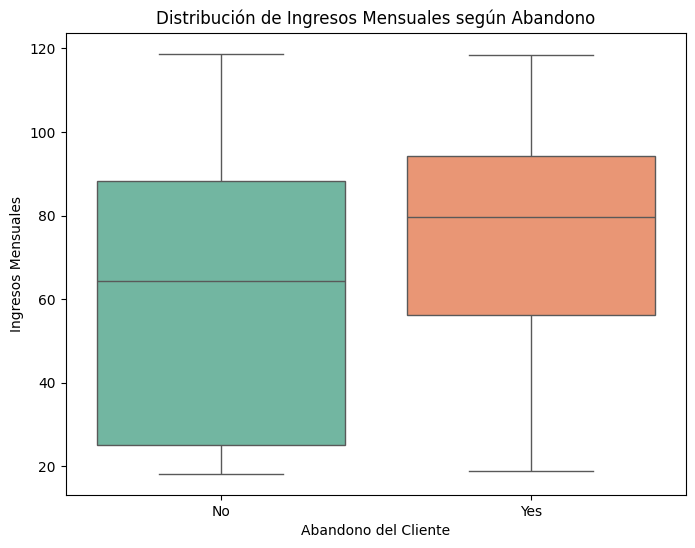

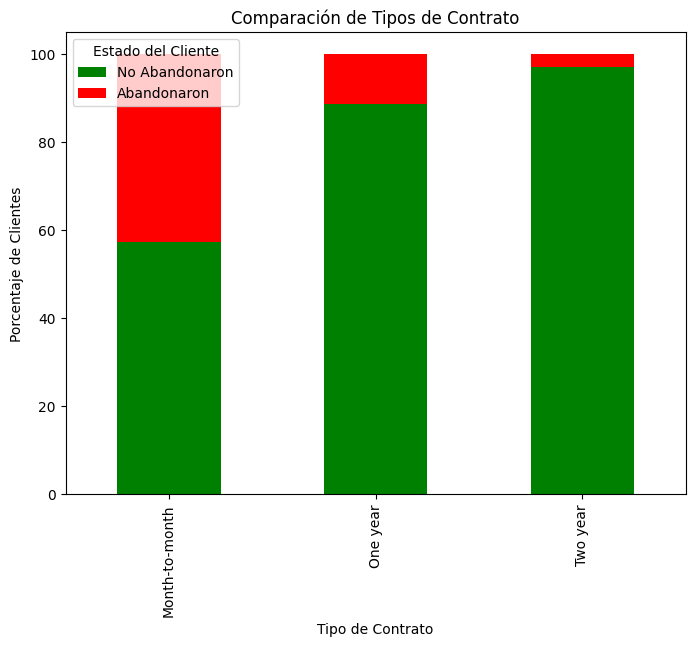

In [7]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el dataset
url = 'Dataset.csv'
data = pd.read_csv(url)

# Preprocesamiento
# Eliminar valores nulos
data = data.dropna()

# Explicación de las variables principales
print("Tenure: Tiempo que el cliente ha estado con la empresa (en meses).")
print("Churn: Indica si el cliente abandonó la empresa ('Yes' = Abandonó, 'No' = Sigue activo).")

# Codificación de la columna 'Contract' (tipo de contrato)
encoder = OneHotEncoder()
contract_encoded = encoder.fit_transform(data[['Contract']]).toarray()
contract_df = pd.DataFrame(contract_encoded, columns=encoder.get_feature_names_out(['Contract']))
data = pd.concat([data, contract_df], axis=1)

# Selección de características para el modelo
X = data[['MonthlyCharges', 'tenure'] + list(contract_df.columns)]
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Evaluación del modelo
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))



# Gráfico 2: Distribución del tiempo de permanencia (tenure)
# Este gráfico muestra cómo se distribuye el tiempo de permanencia (tenure) entre clientes que abandonaron y los que no.
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Churn'] == 'Yes']['tenure'], kde=True, color='red', label='Abandonaron')
sns.histplot(data[data['Churn'] == 'No']['tenure'], kde=True, color='green', label='No Abandonaron')
plt.title("Distribución del Tiempo de Permanencia (tenure)")
plt.xlabel("Meses de Permanencia")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Estado del Cliente")
plt.show()

# Gráfico 3: Distribución de ingresos mensuales (MonthlyCharges)
# Este gráfico muestra cómo varían los ingresos mensuales según si los clientes abandonaron o no.
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Churn'], y=data['MonthlyCharges'], palette='Set2')
plt.title("Distribución de Ingresos Mensuales según Abandono")
plt.xlabel("Abandono del Cliente")
plt.ylabel("Ingresos Mensuales")
plt.show()

# Gráfico 4: Comparación de tipos de contrato
# Este gráfico compara el porcentaje de clientes que abandonaron según el tipo de contrato.
contract_abandon = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_abandon.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])
plt.title("Comparación de Tipos de Contrato")
plt.ylabel("Porcentaje de Clientes")
plt.xlabel("Tipo de Contrato")
plt.legend(["No Abandonaron", "Abandonaron"], title="Estado del Cliente")
plt.show()
